# End-to-End Web Scraping & Analysis Project: Flipkart iPhone 16

## Project Objective
The goal of this project is to extract detailed product data of the iPhone 16 from Flipkart using web scraping techniques, clean and organize the data using Python, and analyze it through visualizations to derive valuable business insights.

---

## Workflow Overview
## `Data Collection → Data Understanding → Data Cleaning → Data Visualization → Insights`


---

## 1. Data Collection (Web Scraping)

We used Python libraries like `requests` and `BeautifulSoup` to scrape product details of iPhone 16 models from multiple pages on Flipkart.

### Key Tasks:
- Sent HTTP GET requests to Flipkart search result pages.
- Parsed the HTML response to extract:
  - Product Name
  - ROM / Storage
  - Display Type
  - Camera Specs
  - Processor Details
  - Warranty Info
  - Ratings
  - Number of Reviews
  - Price

---

## 2. Data Understanding

Once the raw data was scraped:
- We reviewed the structure of the data.
- Checked for missing fields, inconsistent formats, and irregular symbols (e.g., `\xa0`, `&`).
- Verified if all lists (columns) were of equal length and properly aligned.

---

## 3. Data Cleaning (Using Pandas & Regex)

We used the `pandas`  library to structure the data into a DataFrame and applied regular expressions for text cleaning.

### Cleaning Steps:
- Removed unwanted characters and spaces.
- Extracted rating, review count, and price using regex.
- Replaced missing or invalid entries with `NaN` for consistency.
- Converted data types (e.g., strings to floats/integers where required).

---

## 4. Data Visualization (EDA)

We used `matplotlib` and `seaborn` for creating plots to better understand and analyze the data.

### Univariate Analysis:
- Distribution of product ratings
- Most common ROM variants
- Frequency of different price points

### Bivariate Analysis:
- Relationship between ratings and number of reviews
- Price vs rating comparison

### Multivariate Analysis:
- Combined analysis of rating, price, and storage
- Heatmaps to explore correlations

---

## 5. Insights & Observations

From our analysis:
- Some variants of iPhone 16 consistently received higher ratings.
- Products with more reviews generally had higher visibility and better ratings.
- Price differences were observed across different storage configurations.

---

## Final Output

- A clean and structured dataset saved as:  
  `Flipkart_iPhone16_Specs.csv`
- Visual charts and graphs for insights
- Ready for use in dashboards, presentations, or machine learning models

---

## Tools & Libraries Used
- Python
- Requests (for HTTP requests)
- BeautifulSoup (for HTML parsing)
- Pandas (for data manipulation)
- Regex (for text extraction)
- Matplotlib & Seaborn (for data visualization)

---



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

###  Create Empty Lists to Store Scraped Data

In [2]:
#  Create Empty Lists to Store Scraped Data
product_name = []          # Product Titles
product_price = []         # Product Prices
product_rom = []           # Storage Info (ROM)
product_display = []       # Display Details
product_camera = []        # Camera Specifications
product_rating =[]
product_processor =[]

In [3]:
for i in range(1,5):
    url = f"https://www.flipkart.com/search?q=iphone+17&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    response = requests.get(url)
    print(f"Status code {i}",response.status_code)
    html_text = response.text
    soup = BeautifulSoup(html_text)
    

    price  = soup.find_all("div",class_ = "Nx9bqj _4b5DiR")
    
    for i in price:
        # print(i.text)
        product_price.append(re.sub(r"\D","",i.text))
    name = soup.find_all('div',class_= "KzDlHZ")
    for i in name:
        product_name.append(i.text)
    rating = soup.find_all('div',class_= "XQDdHH")
    for i in rating:
        product_rating.append(i.text)
    features = soup.find_all("li",class_="J+igdf")
    for i in features:
        # print(i.text)
        if "ROM" in i.text:
            product_rom.append(i.text)
        elif "Display" in i.text:
            product_display.append(i.text)
        elif "Camera" in i.text:
            product_camera.append(i.text)
        elif "Processor" in i.text:
            product_processor.append(i.text)

Status code 1 200
Status code 2 200
Status code 3 200
Status code 4 200


In [4]:
#  Create Empty Lists to Store Scraped Data
print("product_name ",len(product_name))       
print("product_price ",len(product_price))
print("product_rom " ,len(product_rom))       
print("product_display ",len(product_display))
print("product_camera ",len(product_camera))        
print("product_rating ", len(product_rating))
print("product_processor ", len(product_processor))

product_name  96
product_price  96
product_rom  96
product_display  96
product_camera  96
product_rating  150
product_processor  96


In [5]:
products_df = pd.DataFrame({
    "Product Name": product_name,
    "Price": product_price,
    "ROM": product_rom,
    "Display": product_display,
    "Camera": product_camera,
    "product_processor ": product_processor
})


In [6]:
products_df

,Product Name,Price,ROM,Display,Camera,product_processor
0,"Apple iPhone 17 (Black, 256 GB)",82900,256 GB ROM,16.0 cm (6.3 inch) Super Retina XDR Display,48MP + 48MP | 18MP Front Camera,"A19 Chip, 6 Core Processor Processor"
1,"Apple iPhone 17 (White, 256 GB)",82900,256 GB ROM,16.0 cm (6.3 inch) Super Retina XDR Display,48MP + 48MP | 18MP Front Camera,"A19 Chip, 6 Core Processor Processor"
2,"Apple iPhone 17 (Mist Blue, 256 GB)",82900,256 GB ROM,16.0 cm (6.3 inch) Super Retina XDR Display,48MP + 48MP | 18MP Front Camera,"A19 Chip, 6 Core Processor Processor"
3,"Apple iPhone 17 (Lavender, 256 GB)",82900,256 GB ROM,16.0 cm (6.3 inch) Super Retina XDR Display,48MP + 48MP | 18MP Front Camera,"A19 Chip, 6 Core Processor Processor"
4,"Apple iPhone 17 Pro (Silver, 256 GB)",134900,256 GB ROM,16.0 cm (6.3 inch) Super Retina XDR Display,48MP + 48MP + 48MP | 18MP Front Camera,"A19 Chip, 6 Core Processor Processor"
...,...,...,...,...,...,...
91,"Apple iPhone SE (Red, 64 GB)",39900,64 GB ROM,11.94 cm (4.7 inch) Retina HD Display,12MP Rear Camera | 7MP Front Camera,A13 Bionic Chip with 3rd Gen Neural Engine Pro...
92,"Apple iPhone 16 Plus (Pink, 128 GB)",79900,128 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP | 12MP Front Camera,"A18 Chip, 6 Core Processor Processor"
93,"Apple iPhone Air (Cloud White, 1 TB)",159900,1 TB ROM,16.51 cm (6.5 inch) Super Retina XDR Display,48MP + 48MP | 18MP Front Camera,"A19 Chip, 6 Core Processor Processor"
94,"Apple iPhone 15 Plus (Blue, 256 GB)",79900,256 GB ROM,17.02 cm (6.7 inch) Super Retina XDR Display,48MP + 12MP | 12MP Front Camera,"A16 Bionic Chip, 6 Core Processor Processor"


## Data Cleaning

In [7]:

# Extract Color
products_df['color'] = products_df['Product Name'].apply(
    lambda x : re.findall("\((.+),", x)[0].strip()
)

#  Extract Storage
products_df.storage = products_df['Product Name'].apply(
    lambda x : re.findall(",\s*(\d+)", x)[0]
)


# Extract Max Camera MP
products_df['Camera'] = products_df['Camera'].str.findall(
    r'(\d+)(?=MP)'
).apply(lambda x: max(map(int, x)))

# Extract Product Name
products_df['Product Name'] = products_df['Product Name'].apply(lambda x : re.sub(r"\s\(.+\)","",x))

# Display
products_df.Display = products_df.Display.apply(lambda x: re.findall("\d{2}\.\d{1,2}",x)[0])

C:\Users\DELL 3420\AppData\Local\Temp\ipykernel_18916\3450832337.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  products_df.storage = products_df['Product Name'].apply(


In [8]:
print("Name     :", len(product_name))
print("Price    :", len(product_price))
print("ROM      :", len(product_rom))
print("Display  :", len(product_display))
print("Camera   :", len(product_camera))


Name     : 96
Price    : 96
ROM      : 96
Display  : 96
Camera   : 96


In [9]:
products_df

,Product Name,Price,ROM,Display,Camera,product_processor,color
0,Apple iPhone 17,82900,256 GB ROM,16.0,48,"A19 Chip, 6 Core Processor Processor",Black
1,Apple iPhone 17,82900,256 GB ROM,16.0,48,"A19 Chip, 6 Core Processor Processor",White
2,Apple iPhone 17,82900,256 GB ROM,16.0,48,"A19 Chip, 6 Core Processor Processor",Mist Blue
3,Apple iPhone 17,82900,256 GB ROM,16.0,48,"A19 Chip, 6 Core Processor Processor",Lavender
4,Apple iPhone 17 Pro,134900,256 GB ROM,16.0,48,"A19 Chip, 6 Core Processor Processor",Silver
...,...,...,...,...,...,...,...
91,Apple iPhone SE,39900,64 GB ROM,11.94,12,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,Red
92,Apple iPhone 16 Plus,79900,128 GB ROM,17.02,48,"A18 Chip, 6 Core Processor Processor",Pink
93,Apple iPhone Air,159900,1 TB ROM,16.51,48,"A19 Chip, 6 Core Processor Processor",Cloud White
94,Apple iPhone 15 Plus,79900,256 GB ROM,17.02,48,"A16 Bionic Chip, 6 Core Processor Processor",Blue


In [12]:
products_df['Display'] = pd.to_numeric(products_df['Display'], errors='coerce')
products_df['Price'] = pd.to_numeric(products_df['Price'], errors='coerce')
products_df['Camera'] = pd.to_numeric(products_df['Camera'], errors='coerce')

In [15]:
products_df.to_csv("Iphone_17.csv", index=False)

In [16]:
df = pd.read_csv("Iphone_17.csv")

# Data Visulization

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns style
sns.set(style="whitegrid", palette="pastel")

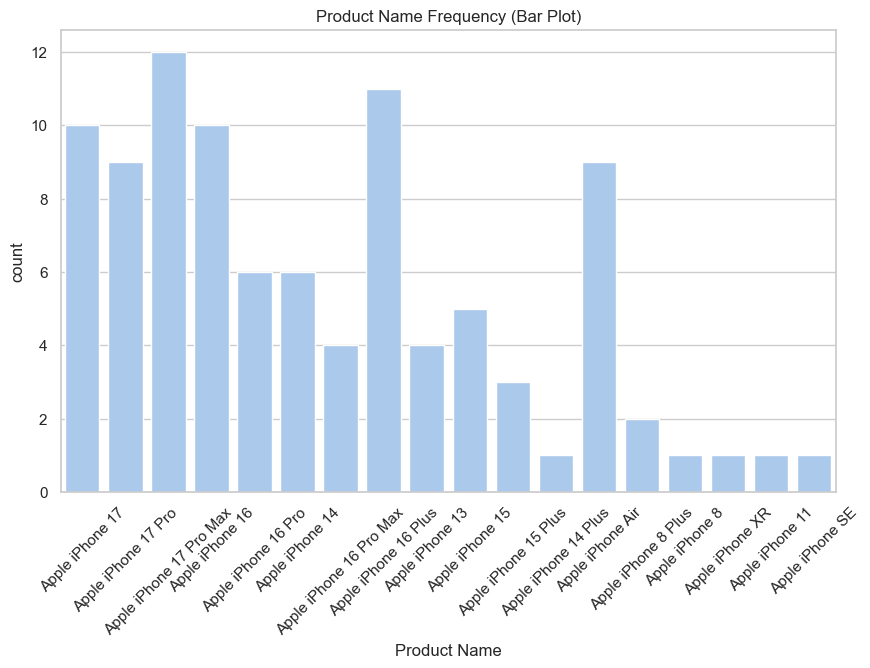

In [19]:

# Product Name	
plt.figure(figsize=(10,6))
sns.countplot(x='Product Name', data=df)
plt.title("Product Name Frequency (Bar Plot)")
plt.xticks(rotation=45)
plt.show()

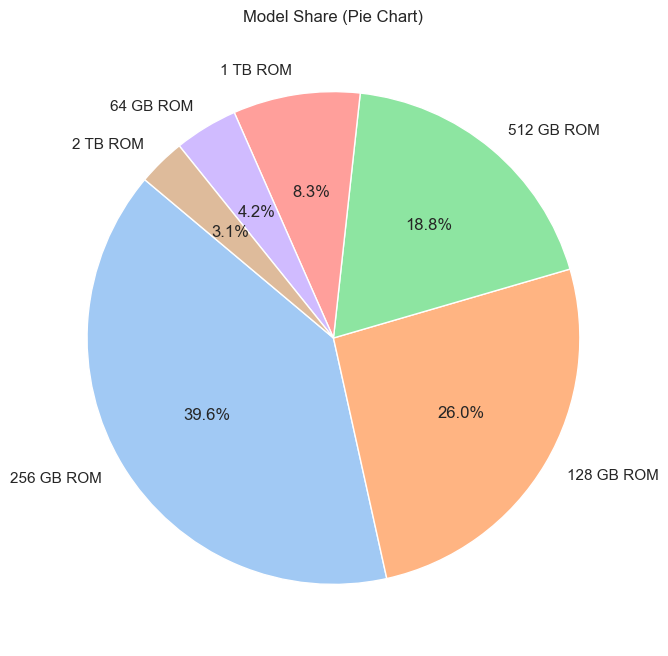

In [21]:

# ROM
model_counts = df['ROM'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Model Share (Pie Chart)")
plt.show()

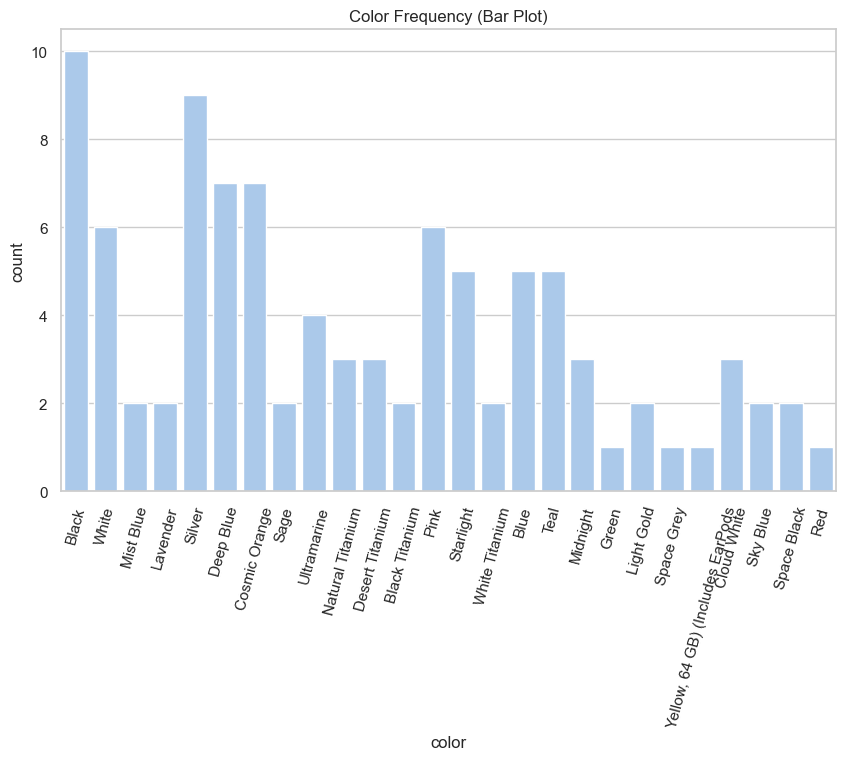

In [24]:
#  Color

plt.figure(figsize=(10,6))
sns.countplot(x='color', data=df)
plt.title("Color Frequency (Bar Plot)")
plt.xticks(rotation=75)
plt.show()

In [20]:
df.columns

Index(['Product Name', 'Price', 'ROM', 'Display', 'Camera',
       'product_processor ', 'color'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Display Size (Histogram)')

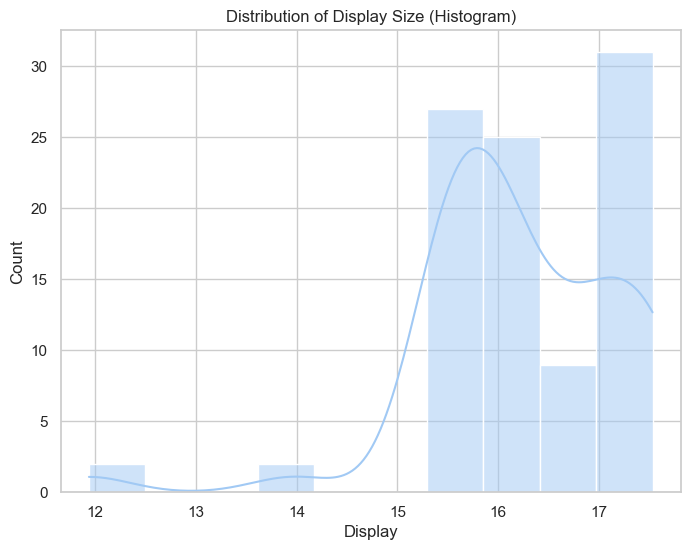

In [25]:

#Display CM

plt.figure(figsize=(8,6))
sns.histplot(df['Display'], bins=10, kde=True)
plt.title("Distribution of Display Size (Histogram)")#

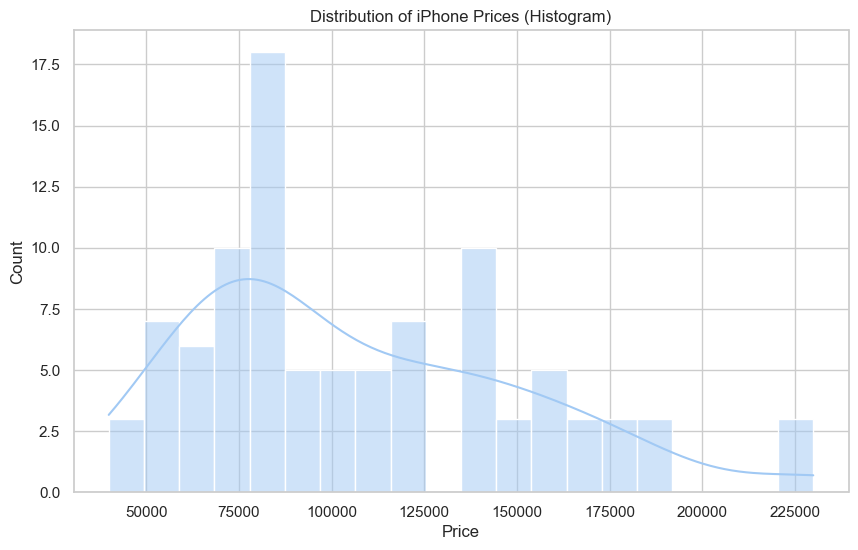

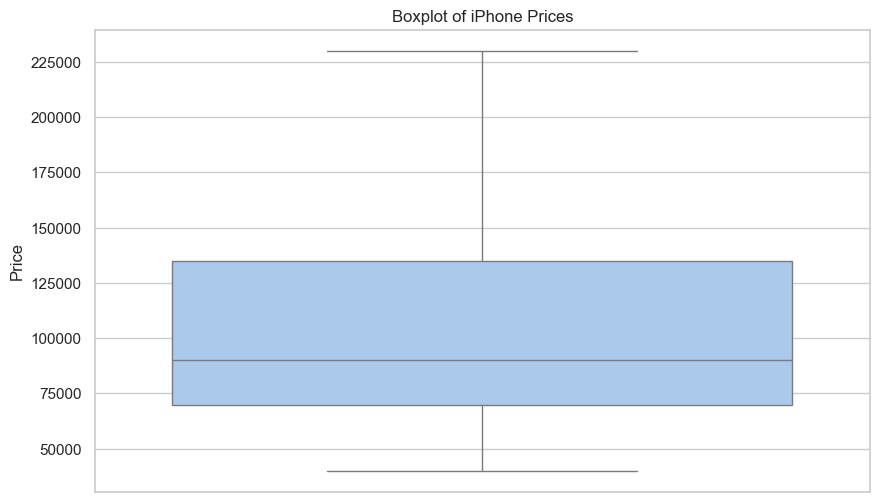

In [26]:
# Price INR

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Distribution of iPhone Prices (Histogram)")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(y='Price', data=df)
plt.title("Boxplot of iPhone Prices")
plt.show()

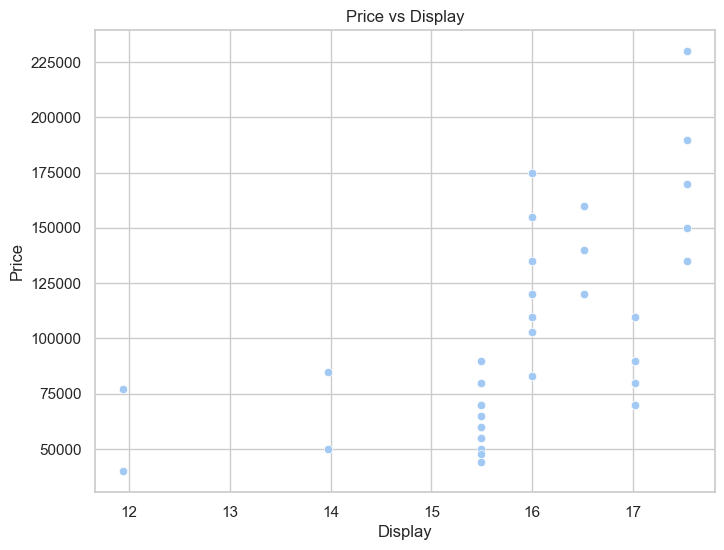

In [29]:
# price vs ratings
plt.figure(figsize=(8,6))
sns.scatterplot(x='Display', y='Price', data=df)
plt.title("Price vs Display")
plt.show()

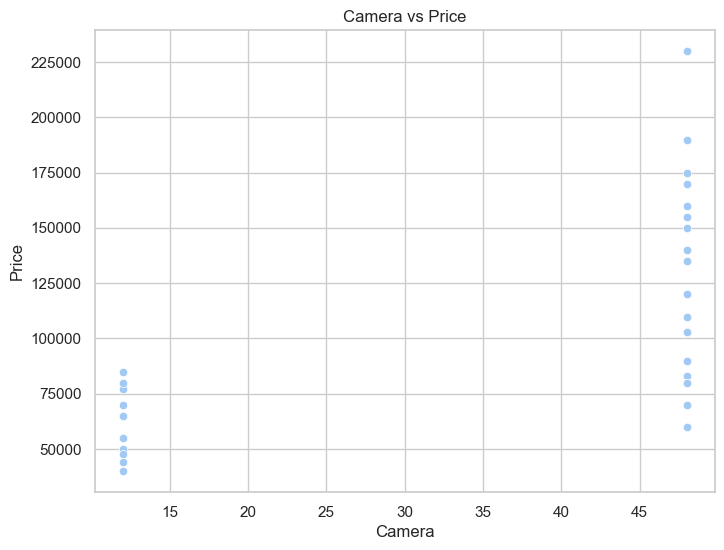

In [31]:
# ratings vs display
plt.figure(figsize=(8,6))
sns.scatterplot(x='Camera', y='Price', data=df)
plt.title("Camera vs Price")
plt.show()

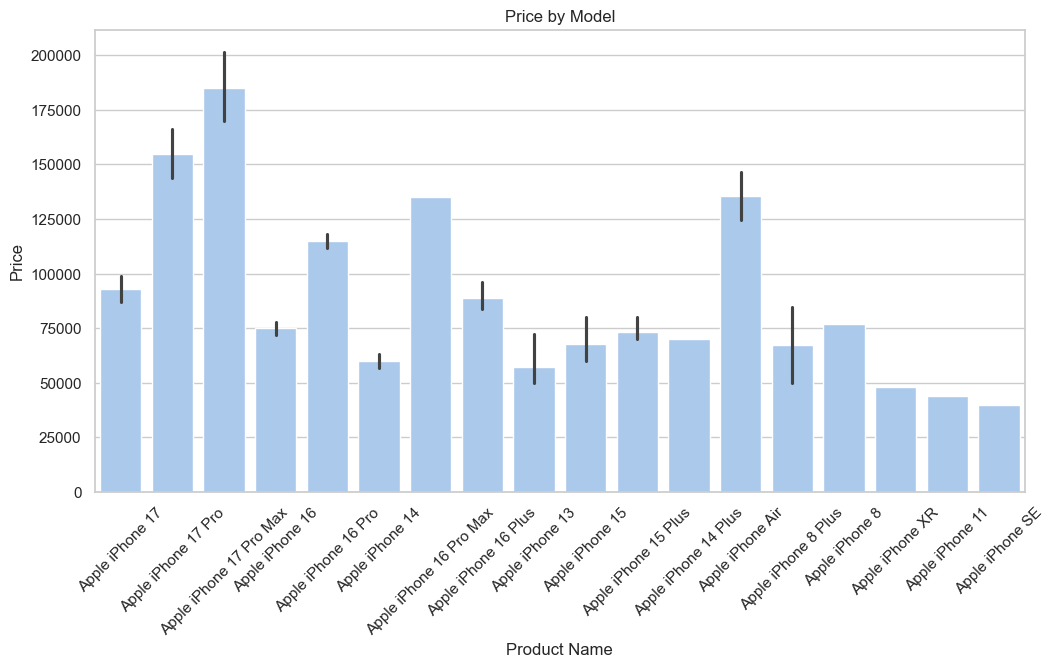

In [33]:

# model vs price
plt.figure(figsize=(12,6))
sns.barplot(x='Product Name', y='Price', data=df)
plt.title("Price by Model")
plt.xticks(rotation=45)
plt.show()

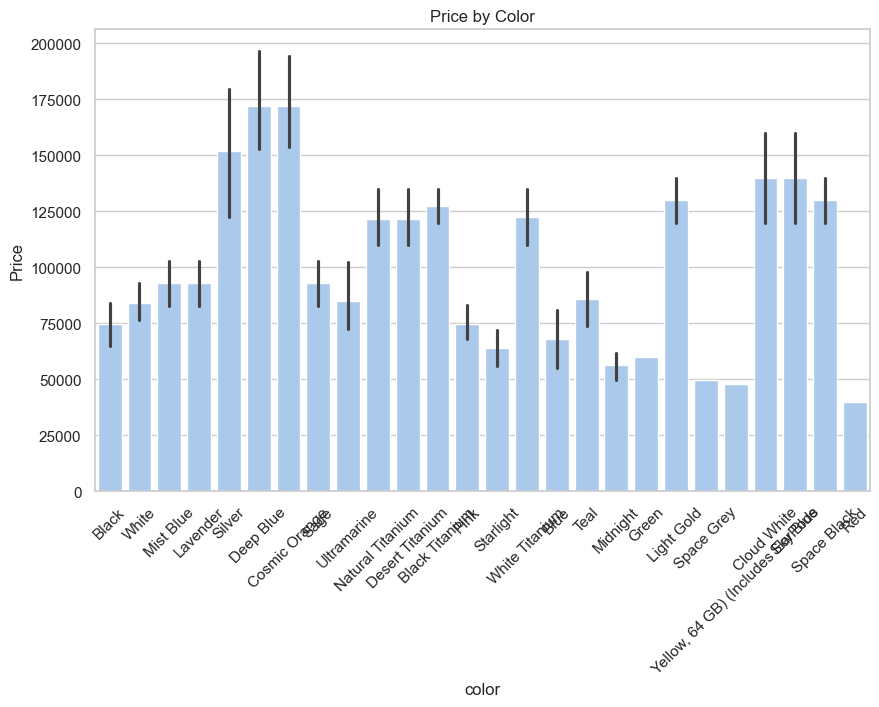

In [37]:

# color vs price
plt.figure(figsize=(10,6))
sns.barplot(x='color', y='Price', data=df)
plt.title("Price by Color")
plt.xticks(rotation=45)
plt.show()